In [269]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [273]:
df = pd.read_csv("urgence_clean.csv")
df.head(10)

,Unnamed: 0,Age_Moyen_Sejour_Annees,Libelle_Etat_Dossier,Hospitalisation,Type_de_PEC,Motif_de_recours,Tri_IOA,Discipline_Examen,Date_Heure_Entree_Sejour,Date_Heure_PEC_IOA,...,age,Jour_Entree,Heure_Entree,nombre_patients_present,Jour,Mois,Annee,Semaine_Annee,jour_ferie,residus
0,37073,45,Ouvert,0,Circuit Long MED,Neurologie,Tri 4,002 - Médecine,2023-01-01 00:35:00,2023-01-01 00:41:00,...,31-60,Dimanche,0,45,1,1,2023,52,1,1.922728
1,37074,24,Ouvert,0,Circuit Court CHIR,Peau,Tri 4,003 - Chirurgie,2023-01-01 01:06:00,2023-01-01 01:09:00,...,19-30,Dimanche,1,44,1,1,2023,52,1,5.071091
2,37075,49,Ouvert,1,NaN,NaN,NaN,003 - Chirurgie,2023-01-01 01:27:00,NaN,...,31-60,Dimanche,1,44,1,1,2023,52,1,NaN
3,37076,20,Ouvert,0,Circuit Long MED,Genito-urinaire,Tri 3A,002 - Médecine,2023-01-01 01:50:00,2023-01-01 02:04:00,...,19-30,Dimanche,1,42,1,1,2023,52,1,1.657929
4,37077,69,Ouvert,0,Circuit Long MED,Rhumatologie,Tri 3B,002 - Médecine,2023-01-01 01:58:00,2023-01-01 02:18:00,...,61-80,Dimanche,1,43,1,1,2023,52,1,-5.036424
5,37078,18,Ouvert,0,Circuit Long CHIR,Peau,Tri 4,002 - Médecine,2023-01-01 02:26:00,2023-01-01 02:33:00,...,0-18,Dimanche,2,42,1,1,2023,52,1,-6.639515
6,37079,15,Ouvert,0,Circuit Long MED,Intoxication,Tri 3B,002 - Médecine,2023-01-01 02:29:00,2023-01-01 02:43:00,...,0-18,Dimanche,2,43,1,1,2023,52,1,4.695531
7,37080,64,Ouvert,0,Circuit Long MED,ORL,Tri 4,002 - Médecine,2023-01-01 02:32:00,2023-01-01 02:35:00,...,61-80,Dimanche,2,44,1,1,2023,52,1,-9.097846
8,37081,58,Ouvert,0,Circuit Long MED,NaN,Tri 3B,002 - Médecine,2023-01-01 02:34:00,2023-01-01 03:23:00,...,31-60,Dimanche,2,45,1,1,2023,52,1,NaN
9,37082,32,Ouvert,0,Circuit Long MED,Intoxication,Tri 3B,002 - Médecine,2023-01-01 03:03:00,2023-01-01 03:07:00,...,31-60,Dimanche,3,45,1,1,2023,52,1,-3.056687


In [275]:
df.columns

Index(['Unnamed: 0', 'Age_Moyen_Sejour_Annees', 'Libelle_Etat_Dossier',
       'Hospitalisation', 'Type_de_PEC', 'Motif_de_recours', 'Tri_IOA',
       'Discipline_Examen', 'Date_Heure_Entree_Sejour', 'Date_Heure_PEC_IOA',
       'Date_Heure_PEC_MED', 'Date_Heure_Sortie_Urgences',
       'Delai_entree_IOA_heure', 'Delai_IOA_MED_heure',
       'Delai_entree_MED_heure', 'Delai_MED_sortie_heure',
       'Duree_totale_heure', 'age', 'Jour_Entree', 'Heure_Entree',
       'nombre_patients_present', 'Jour', 'Mois', 'Annee', 'Semaine_Annee',
       'jour_ferie', 'residus'],
      dtype='object')

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78466 entries, 0 to 78465
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  78466 non-null  int64  
 1   Age_Moyen_Sejour_Annees     78466 non-null  int64  
 2   Libelle_Etat_Dossier        78466 non-null  object 
 3   Hospitalisation             78466 non-null  int64  
 4   Type_de_PEC                 66377 non-null  object 
 5   Motif_de_recours            65283 non-null  object 
 6   Tri_IOA                     66383 non-null  object 
 7   Discipline_Examen           73514 non-null  object 
 8   Date_Heure_Entree_Sejour    78466 non-null  object 
 9   Date_Heure_PEC_IOA          66263 non-null  object 
 10  Date_Heure_PEC_MED          64048 non-null  object 
 11  Date_Heure_Sortie_Urgences  78407 non-null  object 
 12  Delai_entree_IOA_heure      66263 non-null  object 
 13  Delai_IOA_MED_heure         566

In [279]:
# suppression de tous les NaN (pas le plus recommandé mais le plus rapide)
df = df.dropna()
df.shape

(55677, 27)

In [291]:
#supprimer la colonne Unnamed: 0 (a faire qu'une fois)
#df = df.drop(columns=["Unnamed: 0"])
df.head()

,Age_Moyen_Sejour_Annees,Libelle_Etat_Dossier,Hospitalisation,Type_de_PEC,Motif_de_recours,Tri_IOA,Discipline_Examen,Date_Heure_Entree_Sejour,Date_Heure_PEC_IOA,Date_Heure_PEC_MED,...,age,Jour_Entree,Heure_Entree,nombre_patients_present,Jour,Mois,Annee,Semaine_Annee,jour_ferie,residus
0,45,Ouvert,0,Circuit Long MED,Neurologie,Tri 4,002 - Médecine,2023-01-01 00:35:00,2023-01-01 00:41:00,2023-01-01 10:48:00,...,31-60,Dimanche,0,45,1,1,2023,52,1,1.922728
3,20,Ouvert,0,Circuit Long MED,Genito-urinaire,Tri 3A,002 - Médecine,2023-01-01 01:50:00,2023-01-01 02:04:00,2023-01-01 04:59:00,...,19-30,Dimanche,1,42,1,1,2023,52,1,1.657929
4,69,Ouvert,0,Circuit Long MED,Rhumatologie,Tri 3B,002 - Médecine,2023-01-01 01:58:00,2023-01-01 02:18:00,2023-01-01 06:47:00,...,61-80,Dimanche,1,43,1,1,2023,52,1,-5.036424
5,18,Ouvert,0,Circuit Long CHIR,Peau,Tri 4,002 - Médecine,2023-01-01 02:26:00,2023-01-01 02:33:00,2023-01-01 02:53:00,...,0-18,Dimanche,2,42,1,1,2023,52,1,-6.639515
6,15,Ouvert,0,Circuit Long MED,Intoxication,Tri 3B,002 - Médecine,2023-01-01 02:29:00,2023-01-01 02:43:00,2023-01-01 10:40:00,...,0-18,Dimanche,2,43,1,1,2023,52,1,4.695531


In [293]:
# Vérifie les noms exacts des colonnes
print(df.columns)

Index(['Age_Moyen_Sejour_Annees', 'Libelle_Etat_Dossier', 'Hospitalisation',
       'Type_de_PEC', 'Motif_de_recours', 'Tri_IOA', 'Discipline_Examen',
       'Date_Heure_Entree_Sejour', 'Date_Heure_PEC_IOA', 'Date_Heure_PEC_MED',
       'Date_Heure_Sortie_Urgences', 'Delai_entree_IOA_heure',
       'Delai_IOA_MED_heure', 'Delai_entree_MED_heure',
       'Delai_MED_sortie_heure', 'Duree_totale_heure', 'age', 'Jour_Entree',
       'Heure_Entree', 'nombre_patients_present', 'Jour', 'Mois', 'Annee',
       'Semaine_Annee', 'jour_ferie', 'residus'],
      dtype='object')


In [295]:
import pandas as pd

# convertir la colonne de la cible (target : Duree_totale_heure) en minutes
df["Duree_totale_heure"]=pd.to_timedelta(df.Duree_totale_heure) #convertir dans le type time la cible
df["TotalMin"] = df["Duree_totale_heure"].dt.total_seconds()/60 #convertir en min pour avoir une variable continue et utiliser un modèle de régréssion linéaire
df.drop(columns=["Duree_totale_heure"]) #suppression de ma cible en heure inutile


# Transformer les variables catégorielle en numérique (Label Encoder ou OneHot Encoder)
# Créer un objet LabelEncoder

label_encoder = LabelEncoder()

# --- 1. Transformation des variables catégorielles en numérique (Label Encoding)

df['Age_Moyen_Sejour_Annees'] = label_encoder.fit_transform(df['Age_Moyen_Sejour_Annees'])
df['Tri_IOA'] = label_encoder.fit_transform(df['Tri_IOA'])
df['Jour_Entree'] = label_encoder.fit_transform(df['Jour_Entree'])
df['jour_ferie'] = label_encoder.fit_transform(df['jour_ferie'])  # binaire 0 ou 1
df['Motif_de_recours'] = label_encoder.fit_transform(df['Motif_de_recours'])
df['Discipline_Examen'] = label_encoder.fit_transform(df['Discipline_Examen'])

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Créer un objet LabelEncoder
label_encoder = LabelEncoder()

# --- 1. Transformation des variables catégorielles en numérique (Label Encoding)
# Liste des colonnes catégorielles à encoder
categorical_columns = ['Libelle_Etat_Dossier', 'Type_de_PEC', 'Tri_IOA', 'age', 'Jour_Entree', 'jour_ferie']

# Vérifier si chaque colonne existe avant d'appliquer l'encodage
for col in categorical_columns:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])
    else:
        print(f"Colonne {col} non trouvée dans le DataFrame.")

# --- 2. Conversion des dates/temps en caractéristiques numériques utiles
df['Date_Heure_Entree_Sejour'] = pd.to_datetime(df['Date_Heure_Entree_Sejour'])
df['Date_Heure_PEC_IOA'] = pd.to_datetime(df['Date_Heure_PEC_IOA'])
df['Date_Heure_PEC_MED'] = pd.to_datetime(df['Date_Heure_PEC_MED'])
df['Date_Heure_Sortie_Urgences'] = pd.to_datetime(df['Date_Heure_Sortie_Urgences'])

# Extraire des informations de date/heure
df['Entree_Sejour_Annee'] = df['Date_Heure_Entree_Sejour'].dt.year
df['Entree_Sejour_Mois'] = df['Date_Heure_Entree_Sejour'].dt.month
df['Entree_Sejour_Jour'] = df['Date_Heure_Entree_Sejour'].dt.day
df['Entree_Sejour_Heure'] = df['Date_Heure_Entree_Sejour'].dt.hour
df['PEC_IOA_Annee'] = df['Date_Heure_PEC_IOA'].dt.year
df['PEC_IOA_Mois'] = df['Date_Heure_PEC_IOA'].dt.month
df['PEC_IOA_Jour'] = df['Date_Heure_PEC_IOA'].dt.day
df['PEC_IOA_Heure'] = df['Date_Heure_PEC_IOA'].dt.hour
df['PEC_MED_Annee'] = df['Date_Heure_PEC_MED'].dt.year
df['PEC_MED_Mois'] = df['Date_Heure_PEC_MED'].dt.month
df['PEC_MED_Jour'] = df['Date_Heure_PEC_MED'].dt.day
df['PEC_MED_Heure'] = df['Date_Heure_PEC_MED'].dt.hour
df['Sortie_Urgences_Annee'] = df['Date_Heure_Sortie_Urgences'].dt.year
df['Sortie_Urgences_Mois'] = df['Date_Heure_Sortie_Urgences'].dt.month
df['Sortie_Urgences_Jour'] = df['Date_Heure_Sortie_Urgences'].dt.day
df['Sortie_Urgences_Heure'] = df['Date_Heure_Sortie_Urgences'].dt.hour

# --- 3. Transformation des colonnes de durée en minutes
df['Delai_entree_IOA_heure'] = pd.to_timedelta(df['Delai_entree_IOA_heure']).dt.total_seconds() / 60
df['Delai_IOA_MED_heure'] = pd.to_timedelta(df['Delai_IOA_MED_heure']).dt.total_seconds() / 60
df['Delai_entree_MED_heure'] = pd.to_timedelta(df['Delai_entree_MED_heure']).dt.total_seconds() / 60
df['Delai_MED_sortie_heure'] = pd.to_timedelta(df['Delai_MED_sortie_heure']).dt.total_seconds() / 60
df['Duree_totale_heure'] = pd.to_timedelta(df['Duree_totale_heure']).dt.total_seconds() / 60

# --- 4. Supprimer les colonnes inutiles (si tu veux) ---
df = df.drop(columns=['Date_Heure_Entree_Sejour', 'Date_Heure_PEC_IOA', 'Date_Heure_PEC_MED', 'Date_Heure_Sortie_Urgences'])

# Vérification du résultat
print(df.head())



   Age_Moyen_Sejour_Annees  Libelle_Etat_Dossier  Hospitalisation  \
0                       44                     0                0   
3                       19                     0                0   
4                       68                     0                0   
5                       17                     0                0   
6                       14                     0                0   

   Type_de_PEC  Motif_de_recours  Tri_IOA  Discipline_Examen  \
0            3                 7        4                  1   
3            3                 4        2                  1   
4            3                15        3                  1   
5            2                11        4                  1   
6            3                 6        3                  1   

   Delai_entree_IOA_heure  Delai_IOA_MED_heure  Delai_entree_MED_heure  ...  \
0                     6.0                607.0                   613.0  ...   
3                    14.0                1

In [297]:
# Séparer la target (TotalMin) des features (caractéristiques)
X = df.drop(columns=['TotalMin'])  # Toutes les colonnes sauf 'TotalMin' comme features
y = df['TotalMin']  # La colonne 'TotalMin' comme cible (target)

# Vérification des dimensions de X et y
print(X.shape)
print(y.shape)

(55677, 38)
(55677,)


In [299]:
# Séparer les données en train (80%) et test (20%) sans mélanger (shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Vérification des dimensions
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (44541, 38)
X_test shape: (11136, 38)
y_train shape: (44541,)
y_test shape: (11136,)


In [301]:
# Instancier un modèle Random Forest en spécifiant les hyperparamètres (attention il faut absolument mettre une valeur pour max_depth)

# Instancier un modèle Random Forest avec hyperparamètres spécifiés
rf_model = RandomForestRegressor(
    n_estimators=100,         # Nombre d'arbres dans la forêt (par défaut 100)
    max_depth=10,             # Profondeur maximale de chaque arbre
    random_state=42,          # Pour la reproductibilité des résultats
    n_jobs=-1,                # Utiliser tous les cœurs de processeur disponibles
    min_samples_split=2,      # Nombre minimum d'échantillons requis pour diviser un noeud
    min_samples_leaf=1,       # Nombre minimum d'échantillons dans une feuille
    max_features='auto',      # Nombre de caractéristiques à utiliser lors de la division
)

# Affichage du modèle
print(rf_model)

RandomForestRegressor(max_depth=10, max_features='auto', n_jobs=-1,
                      random_state=42)


In [303]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Séparer les features (X) et la cible (y)
X = df.drop(columns=['TotalMin'])  # Features
y = df['TotalMin']                # Target

# Diviser les données en ensembles de train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Instancier le modèle RandomForestRegressor avec les hyperparamètres
rf_model = RandomForestRegressor(
    n_estimators=100,              # Nombre d'arbres
    max_depth=10,                  # Profondeur maximale des arbres
    max_features='sqrt',           # Nombre de caractéristiques à utiliser par split (ici 'sqrt')
    min_samples_split=2,           # Nombre minimum d'échantillons pour diviser un noeud
    min_samples_leaf=1,            # Nombre minimum d'échantillons dans une feuille
    n_jobs=-1,                     # Utiliser tous les cœurs de processeur
    random_state=42                # Fixer la graine pour la reproductibilité
)

# Entraîner le modèle sur les données d'entraînement
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, max_features='sqrt', n_jobs=-1,
                      random_state=42)

In [305]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Instancier le modèle RandomForestRegressor
rf_model = RandomForestRegressor(max_depth=10, max_features='sqrt', n_jobs=-1, random_state=42)

# Séparer les features et la cible
X = df.drop(columns=['TotalMin'])
y = df['TotalMin']

# Séparer les données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Faire des prédictions
y_test_pred = rf_model.predict(X_test)

# Afficher les prédictions
y_test_pred


array([622.82135916, 684.07665235, 157.87424624, ..., 317.91994888,
       324.0363237 , 230.62778682])

In [307]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calcul des métriques
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Afficher les résultats
print(f"MAE (Mean Absolute Error) : {mae}")
print(f"MSE (Mean Squared Error) : {mse}")
print(f"RMSE (Root Mean Squared Error) : {rmse}")
print(f"R² (R-squared) : {r2}")


MAE (Mean Absolute Error) : 50.513190670972335
MSE (Mean Squared Error) : 22077.11952875315
RMSE (Root Mean Squared Error) : 148.58371219199347
R² (R-squared) : 0.9257025554360637


/var/folders/_v/6t27_r9501dg5j3b4dj34dyc0000gn/T/ipykernel_35333/2855047145.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


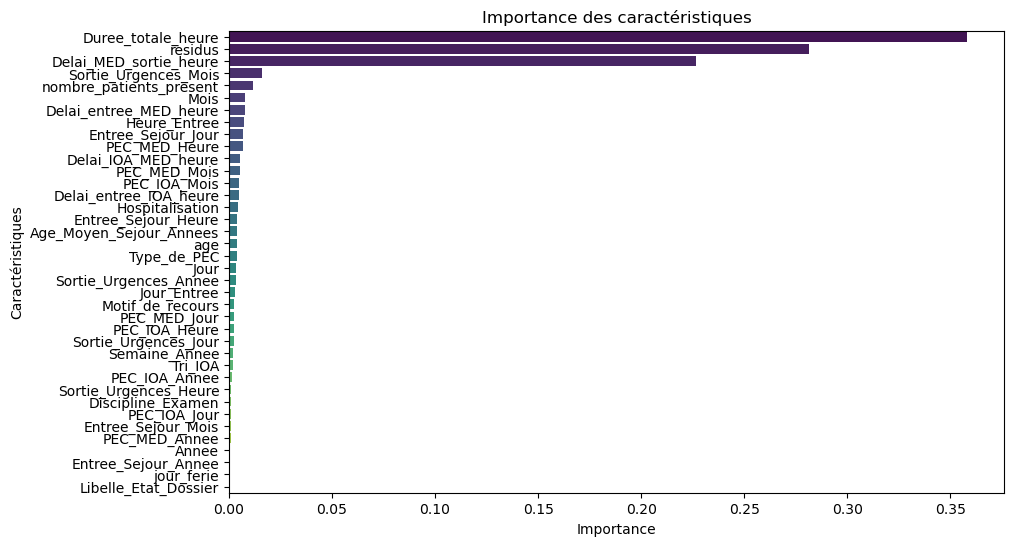

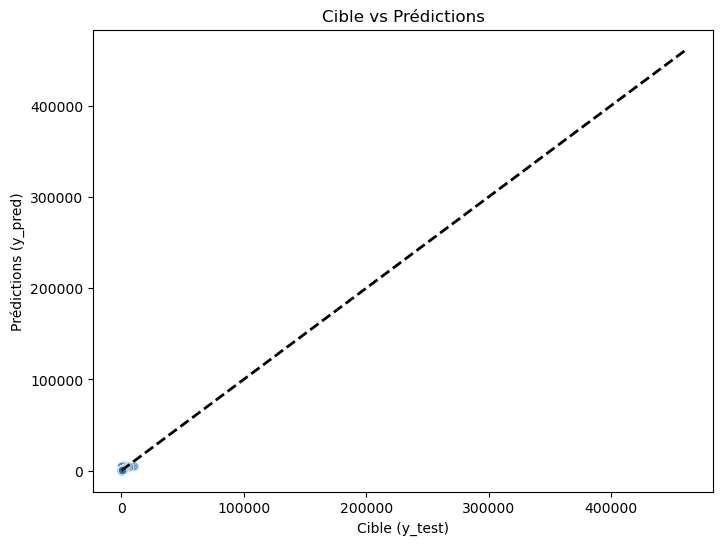

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Séparer les features (X) et la cible (y)
X = df.drop(columns=['TotalMin'])  # Features
y = df['TotalMin']                # Target

# Diviser les données en ensembles de train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Instancier le modèle RandomForestRegressor avec les hyperparamètres
rf_model = RandomForestRegressor(
    max_depth=10,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)

# Entraîner le modèle sur les données d'entraînement
rf_model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_test_pred = rf_model.predict(X_test)  # Calcul des prédictions sur X_test

# 1. Barplot des importance des features
importances = rf_model.feature_importances_  # Récupérer les importances des caractéristiques
features = X.columns  # Récupérer les noms des features

# Trier les importances par ordre décroissant
indices = np.argsort(importances)[::-1]

# Visualiser l'importance des features dans un barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Importance des caractéristiques")
plt.xlabel("Importance")
plt.ylabel("Caractéristiques")
plt.show()

# 2. Scatterplot : Cible vs Prédictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.title("Cible vs Prédictions")
plt.xlabel("Cible (y_test)")
plt.ylabel("Prédictions (y_pred)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Ajouter une ligne de référence pour y=x
plt.show()
